# Nhiệm vụ 1: Tìm hiểu về cách biểu diễn và hiển thị các ảnh từ tập dữ liệu chữ số viết tay

Sử dụng dataset `digits` từ scikit-learn để minh họa biểu diễn và hiển thị ảnh chữ số viết tay từ 0 đến 9.

In [1]:
# 1. Import thư viện và tải dữ liệu
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Tải dataset digits (chữ số viết tay 0-9, mỗi ảnh 8x8 pixels)
digits = load_digits(n_class=10)

print("Dataset loaded successfully.")

Dataset loaded successfully.


In [2]:
# 2. Khảo sát thông tin có trong digits
# Thông tin toàn bộ dữ liệu
print("Dataset info:")
print(digits)

# Xem thông tin của một hình dưới dạng ma trận 8x8
print("\nFirst image as 8x8 matrix:")
print(digits['data'][0].reshape(8, 8))

# Xem thông tin của một hình dưới dạng mảng 1D (64 pixels)
print("\nFirst image as array:")
print(digits['data'][0])

# Xem 9 nhãn đầu tiên
print("\nFirst 9 labels:")
print(digits['target'][0:9])

Dataset info:
{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 

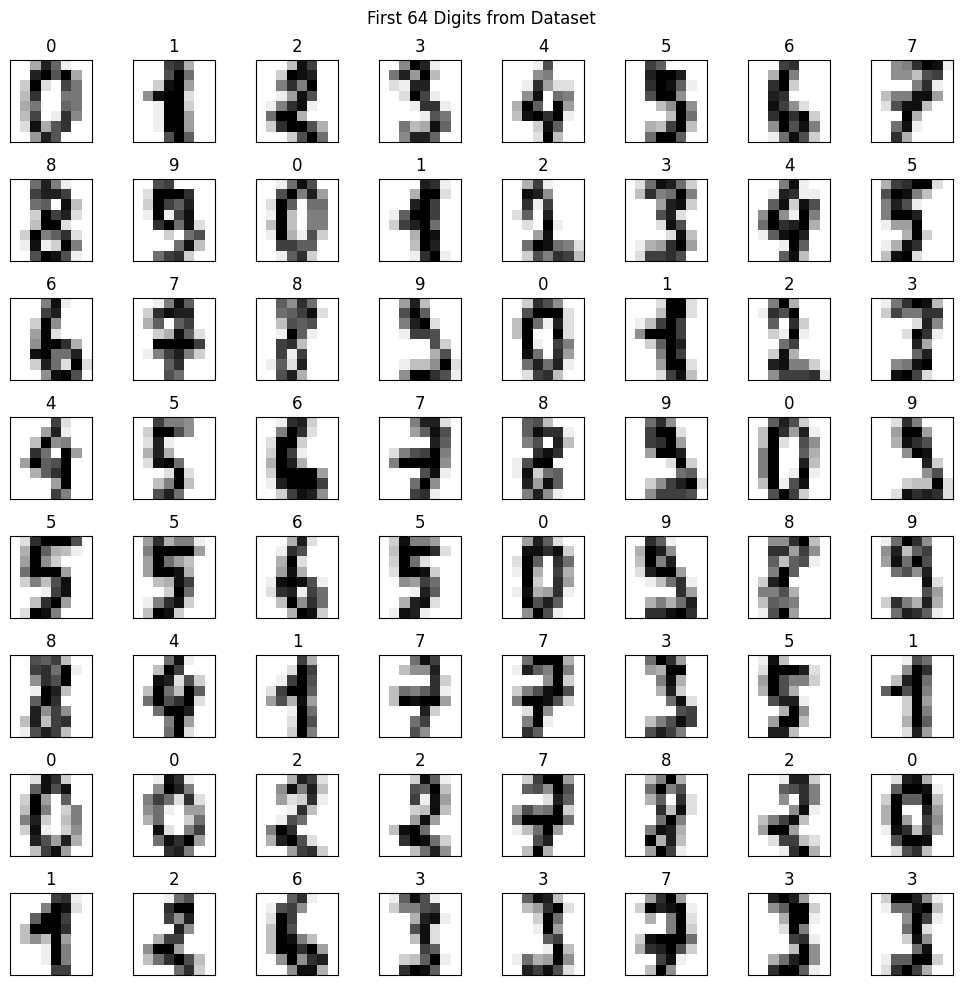

In [3]:
# 3. Vẽ 64 hình đầu tiên (8x8 grid)
fig, ax = plt.subplots(8, 8, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])
    # Hiển thị nhãn dưới mỗi ảnh
    axi.set_title(digits.target[i])
plt.suptitle('First 64 Digits from Dataset')
plt.tight_layout()
plt.show()

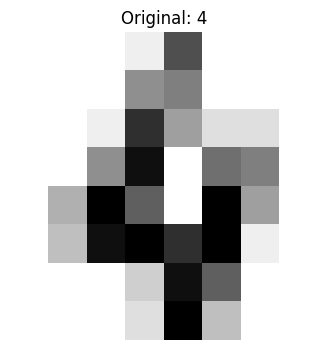

In [4]:
# 4. Hàm vẽ một ảnh từ ma trận 8x8
def view_digit(index):
    plt.figure(figsize=(4, 4))
    plt.imshow(digits.images[index], cmap=plt.cm.gray_r)
    plt.title('Original: ' + str(digits.target[index]))
    plt.axis('off')
    plt.show()

# Vẽ ảnh ở vị trí thứ 4 (index 4)
view_digit(4)

# Nhiệm vụ 2: Xây dựng mô hình SVM để nhận diện chữ viết tay từ 0 – 9

In [5]:
# 1. Chuẩn bị dữ liệu và xây dựng mô hình SVM
from sklearn import svm

# Dữ liệu features (784 pixels, nhưng ở đây dùng digits 64 pixels)
main_data = digits['data']
targets = digits['target']

# Khởi tạo SVM với gamma=0.001 và C=100
svc = svm.SVC(gamma=0.001, C=100)

# Train trên 1500 mẫu đầu tiên
svc.fit(main_data[:1500], targets[:1500])

# Predict trên phần còn lại (từ 1501:)
predictions = svc.predict(main_data[1501:])

print("Model trained and predictions made.")

Model trained and predictions made.


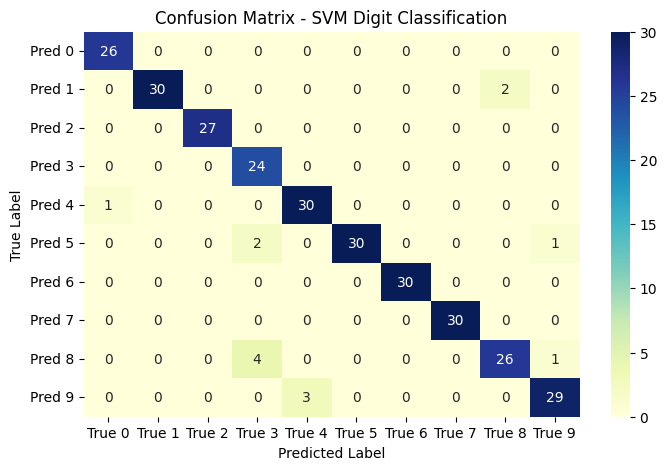

In [6]:
# 2. Đánh giá hiệu quả của mô hình với Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tính confusion matrix
cm = confusion_matrix(predictions, targets[1501:])
conf_matrix = pd.DataFrame(data=cm, columns=[f'True {i}' for i in range(10)], index=[f'Pred {i}' for i in range(10)])

# Vẽ heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix - SVM Digit Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [7]:
# 3. In kết quả dạng văn bản (Classification Report)
from sklearn.metrics import classification_report

print(classification_report(predictions, targets[1501:], target_names=[str(i) for i in range(10)]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.94      0.97        32
           2       1.00      1.00      1.00        27
           3       0.80      1.00      0.89        24
           4       0.91      0.97      0.94        31
           5       1.00      0.91      0.95        33
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.93      0.84      0.88        31
           9       0.94      0.91      0.92        32

    accuracy                           0.95       296
   macro avg       0.95      0.96      0.95       296
weighted avg       0.96      0.95      0.95       296

